In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import rgb2hex

In [2]:
tx= pd.read_csv("temperature_data.csv")

In [3]:
tx.head()

ambient   coolant       u_d       u_q  motor_speed    torque       i_d  \
0 -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182  1.029572   
1 -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133  1.029509   
2 -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431  1.029448   
3 -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636  1.032845   
4 -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701  1.031807   

        i_q        pm  stator_yoke  stator_tooth  stator_winding  profile_id  
0 -0.245860 -2.522071    -1.831422     -2.066143       -2.018033           4  
1 -0.245832 -2.522418    -1.830969     -2.064859       -2.017631           4  
2 -0.245818 -2.522673    -1.830400     -2.064073       -2.017343           4  
3 -0.246955 -2.521639    -1.830333     -2.063137       -2.017632           4  
4 -0.246610 -2.521900    -1.830498     -2.062795       -2.018145           4

In [4]:
tx.tail()

ambient   coolant       u_d       u_q  motor_speed   torque  \
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.25564   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.25564   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.25564   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.25564   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.25564   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
998065  1.029142 -0.245723  0.429853     1.018568      0.836084   
998066  1.029148 -0.245736  0.429751     1.013416      0.834438   
998067  1.029191 -0.245701  0.429439     1.002906      0.833936   
998068  1.029147 -0.245727  0.429558     0.999157      0.830504   
998069  1.029141 -0.245722  0.429166     0.987163      0.828046   

        stator_winding  profile_id  
998065        0.494725          72  
998066        0.494279          72  
998067        0.492666          72  
998068        0.490581          72  
998069        0.489382          72

In [5]:
tx.shape

(998070, 13)

## EDA

In [6]:
tx.describe()

ambient        coolant            u_d            u_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean       -0.003905       0.004723       0.004780      -0.005690   
std         0.993127       1.002423       0.997878       1.002330   
min        -8.573954      -1.429349      -1.655373      -1.861463   
25%        -0.599385      -1.037925      -0.826359      -0.927390   
50%         0.266157      -0.177187       0.267542      -0.099818   
75%         0.686675       0.650709       0.358491       0.852625   
max         2.967117       2.649032       2.274734       1.793498   

         motor_speed         torque            i_d            i_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean       -0.006336      -0.003333       0.006043      -0.003194   
std         1.001229       0.997907       0.998994       0.997912   
min        -1.371529      -3.345953      -3.245874      -3.341639   
25%        -0.951892      -0.266917      -0.756296      -0.257269   
50%        -0.140246      -0.187246       0.213935      -0.190076   
75%         0.853584       0.547171       1.013975       0.499260   
max         2.024164       3.016971       1.060937       2.914185   

                  pm    stator_yoke   stator_tooth  stator_winding  \
count  998070.000000  998070.000000  998070.000000   998070.000000   
mean       -0.004396       0.000609      -0.002208       -0.003935   
std         0.995686       1.001049       0.999597        0.998343   
min        -2.631991      -1.834688      -2.066143       -2.019973   
25%        -0.672308      -0.747265      -0.761951       -0.725622   
50%         0.094367      -0.057226       0.005085        0.006536   
75%         0.680691       0.697344       0.772239        0.725660   
max         2.917456       2.449158       2.326668        2.653781   

          profile_id  
count  998070.000000  
mean       50.732001  
std        22.073125  
min         4.000000  
25%        32.000000  
50%        56.000000  
75%        68.000000  
max        81.000000

In [7]:
tx.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding',
       'profile_id'],
      dtype='object')

In [8]:
tx.nunique()

ambient           718720
coolant           829538
u_d               960969
u_q               931072
motor_speed       490798
torque            695029
i_d               661242
i_q               655589
pm                945166
stator_yoke       861836
stator_tooth      854787
stator_winding    899142
profile_id            52
dtype: int64

In [9]:
#cleaning the data

In [10]:
tx.isnull().sum()  #no NULL values

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

In [11]:
# outliers

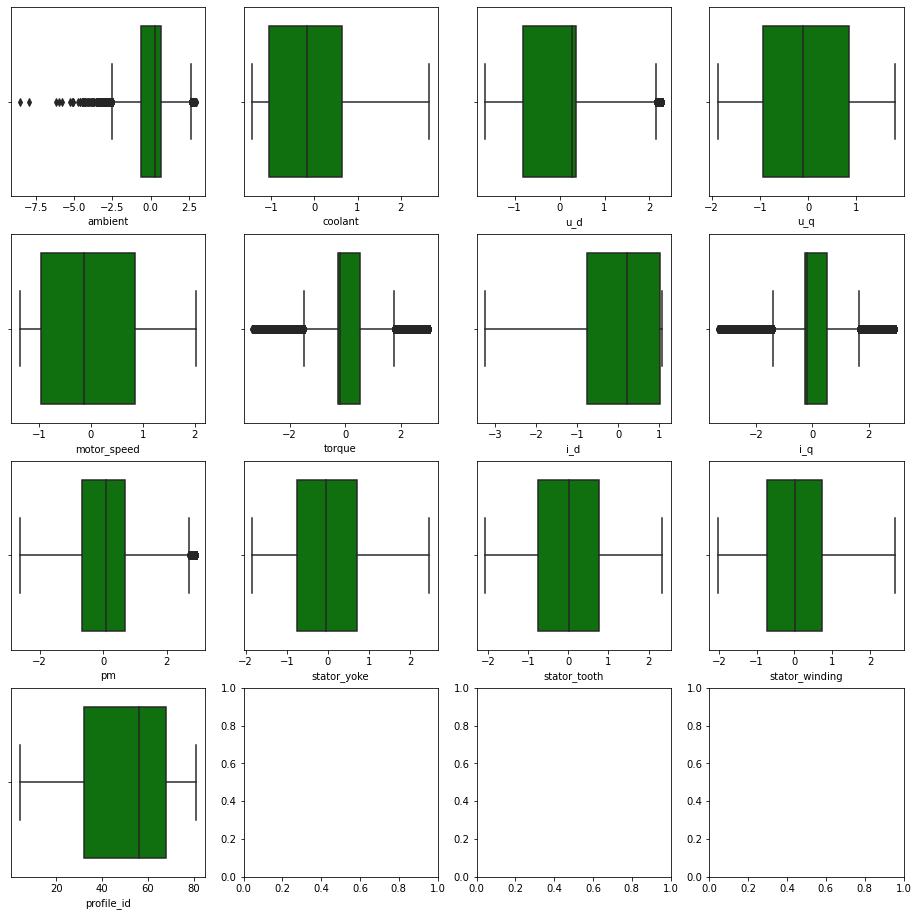

In [12]:
i=0
n_cols = 4
n_rows = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
for i, (col) in enumerate(list(tx.columns)):
    sns.boxplot(x=tx[col],orient='h', ax=axes.flatten()[i], color='g')

### Histogram

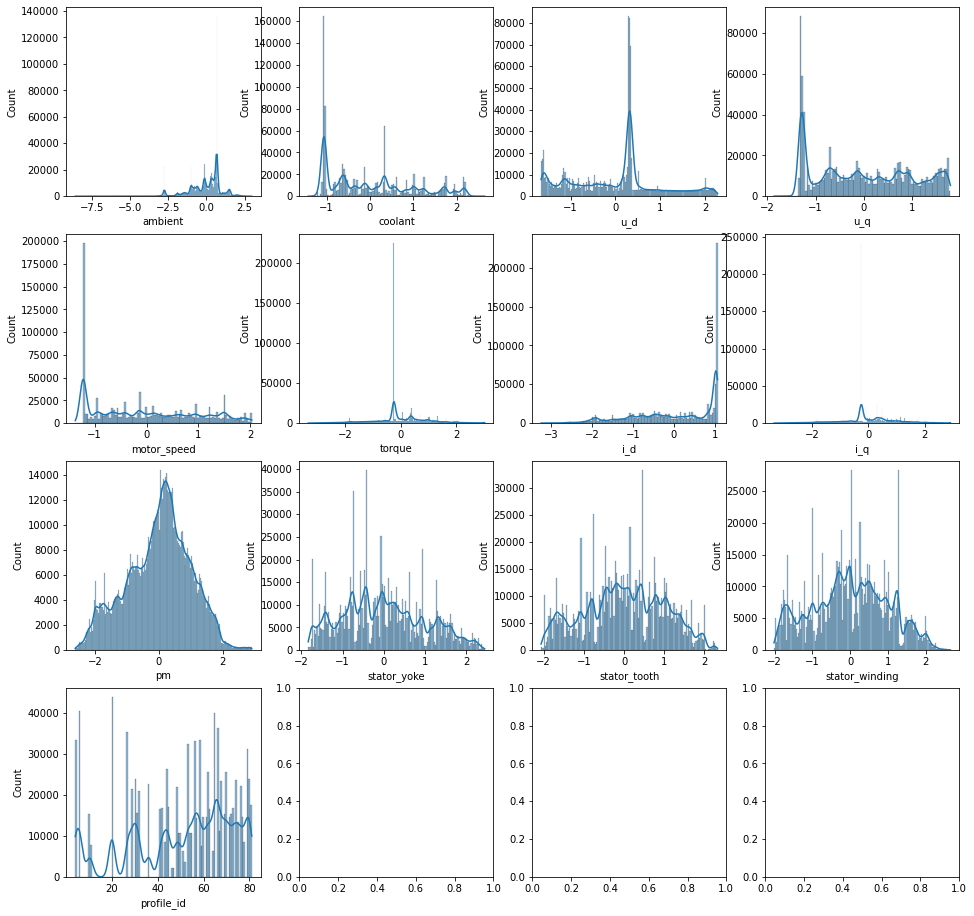

In [13]:
i=0
n_cols = 4
n_rows = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
for i, (col) in enumerate(list(tx.columns)):
    sns.histplot(x=tx[col],ax=axes.flatten()[i], kde=True)

<AxesSubplot:>

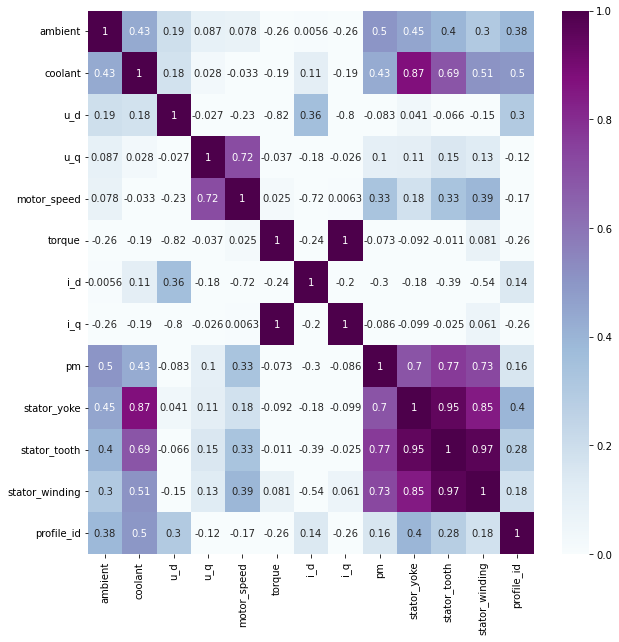

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data=tx.corr(),vmin=0,vmax=1,cmap="BuPu",annot=True)

## Removing Outliers

In [15]:
Q1=tx.ambient.quantile(0.25)
Q3=tx.ambient.quantile(0.75)
Q1, Q3

(-0.59938534, 0.68667525)

In [16]:
IQR=Q3-Q1
IQR

1.28606059

In [17]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-2.528476225, 2.615766135)

In [18]:
df=tx[(tx.ambient>lower_limit)&(tx.ambient<upper_limit)]
df.shape

(959578, 13)

In [19]:
pid_grouped = {pid: df for pid, df in df.groupby('profile_id')}


def parameter_visualizer(pid_grouped, coi, ylabel, n_cols):
    
    n_rows = int(np.ceil(len(pid_grouped) / n_cols))

    color_list = plt.cm.Set1(np.linspace(0, 1, 10))
    feat_clrs = {k: rgb2hex(color_list[i]) for i, k in enumerate(coi)}

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, n_rows*3))

    for i, (ax, (p_id, df_)) in enumerate(zip(axes.flatten(), pid_grouped.items())):
        for col in coi:
            lines = ax.plot(df_[col].reset_index(drop=True), label=col, color=feat_clrs[col])
        ax.set_title(f'profile {p_id}')
        if i % n_cols == 0:
            ax.set_ylabel(ylabel)
        else:
            ax.set_ylabel('')
        if i >= (len(pid_grouped) - n_cols):
            ax.set_xlabel('Sample')
    fig.tight_layout()
    _ = ax.legend(ncol=15, loc='lower center', bbox_to_anchor=(.5, 1), bbox_transform=fig.transFigure)

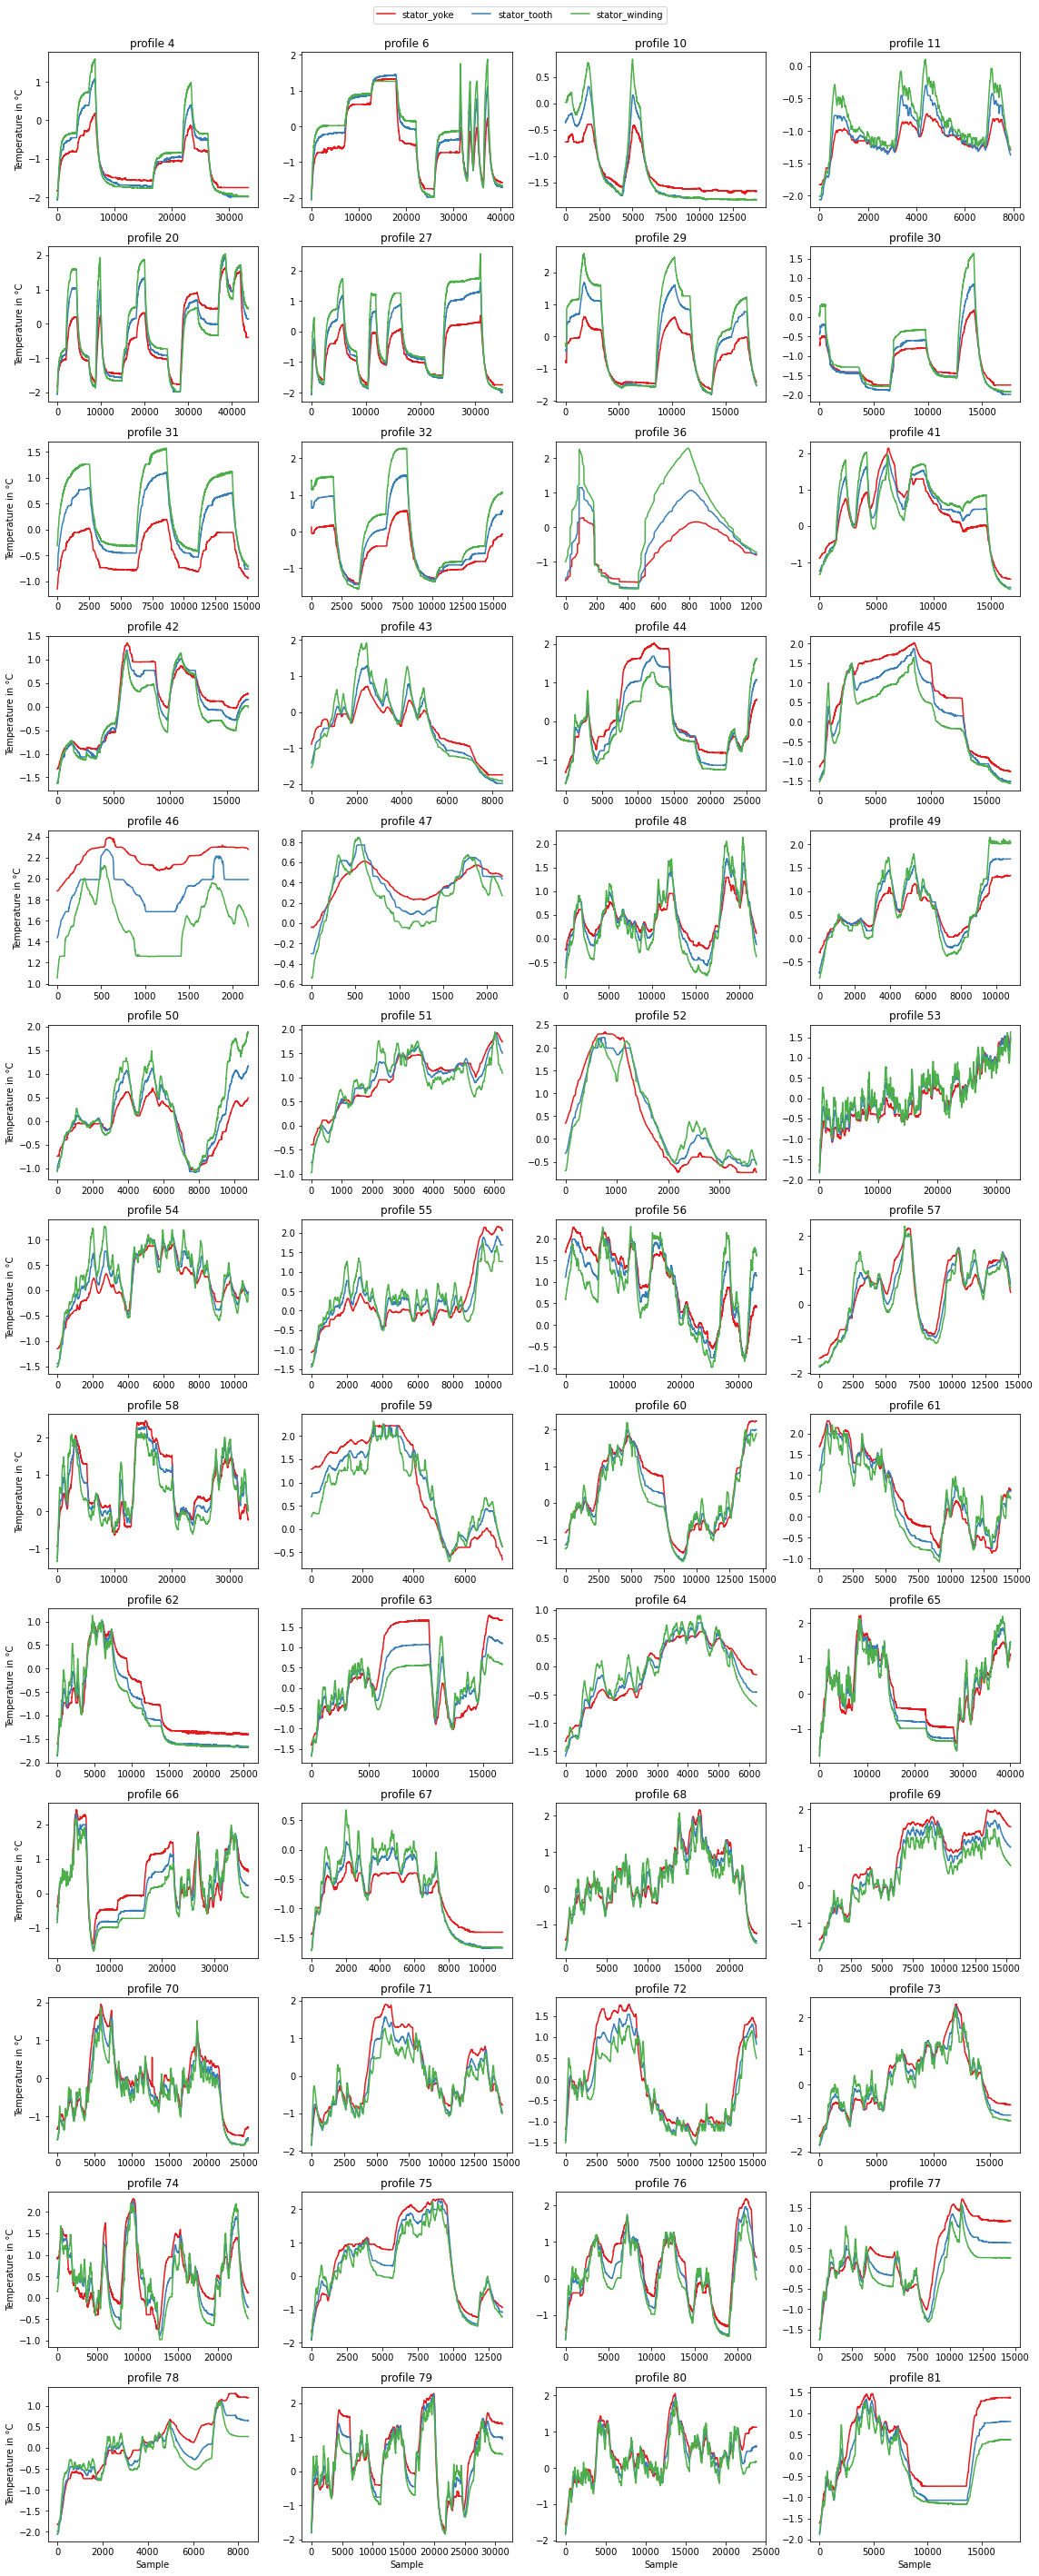

In [20]:
coi = [ 'stator_yoke', 'stator_tooth', 'stator_winding']
parameter_visualizer(pid_grouped, coi, ylabel='Temperature in °C', n_cols=4)

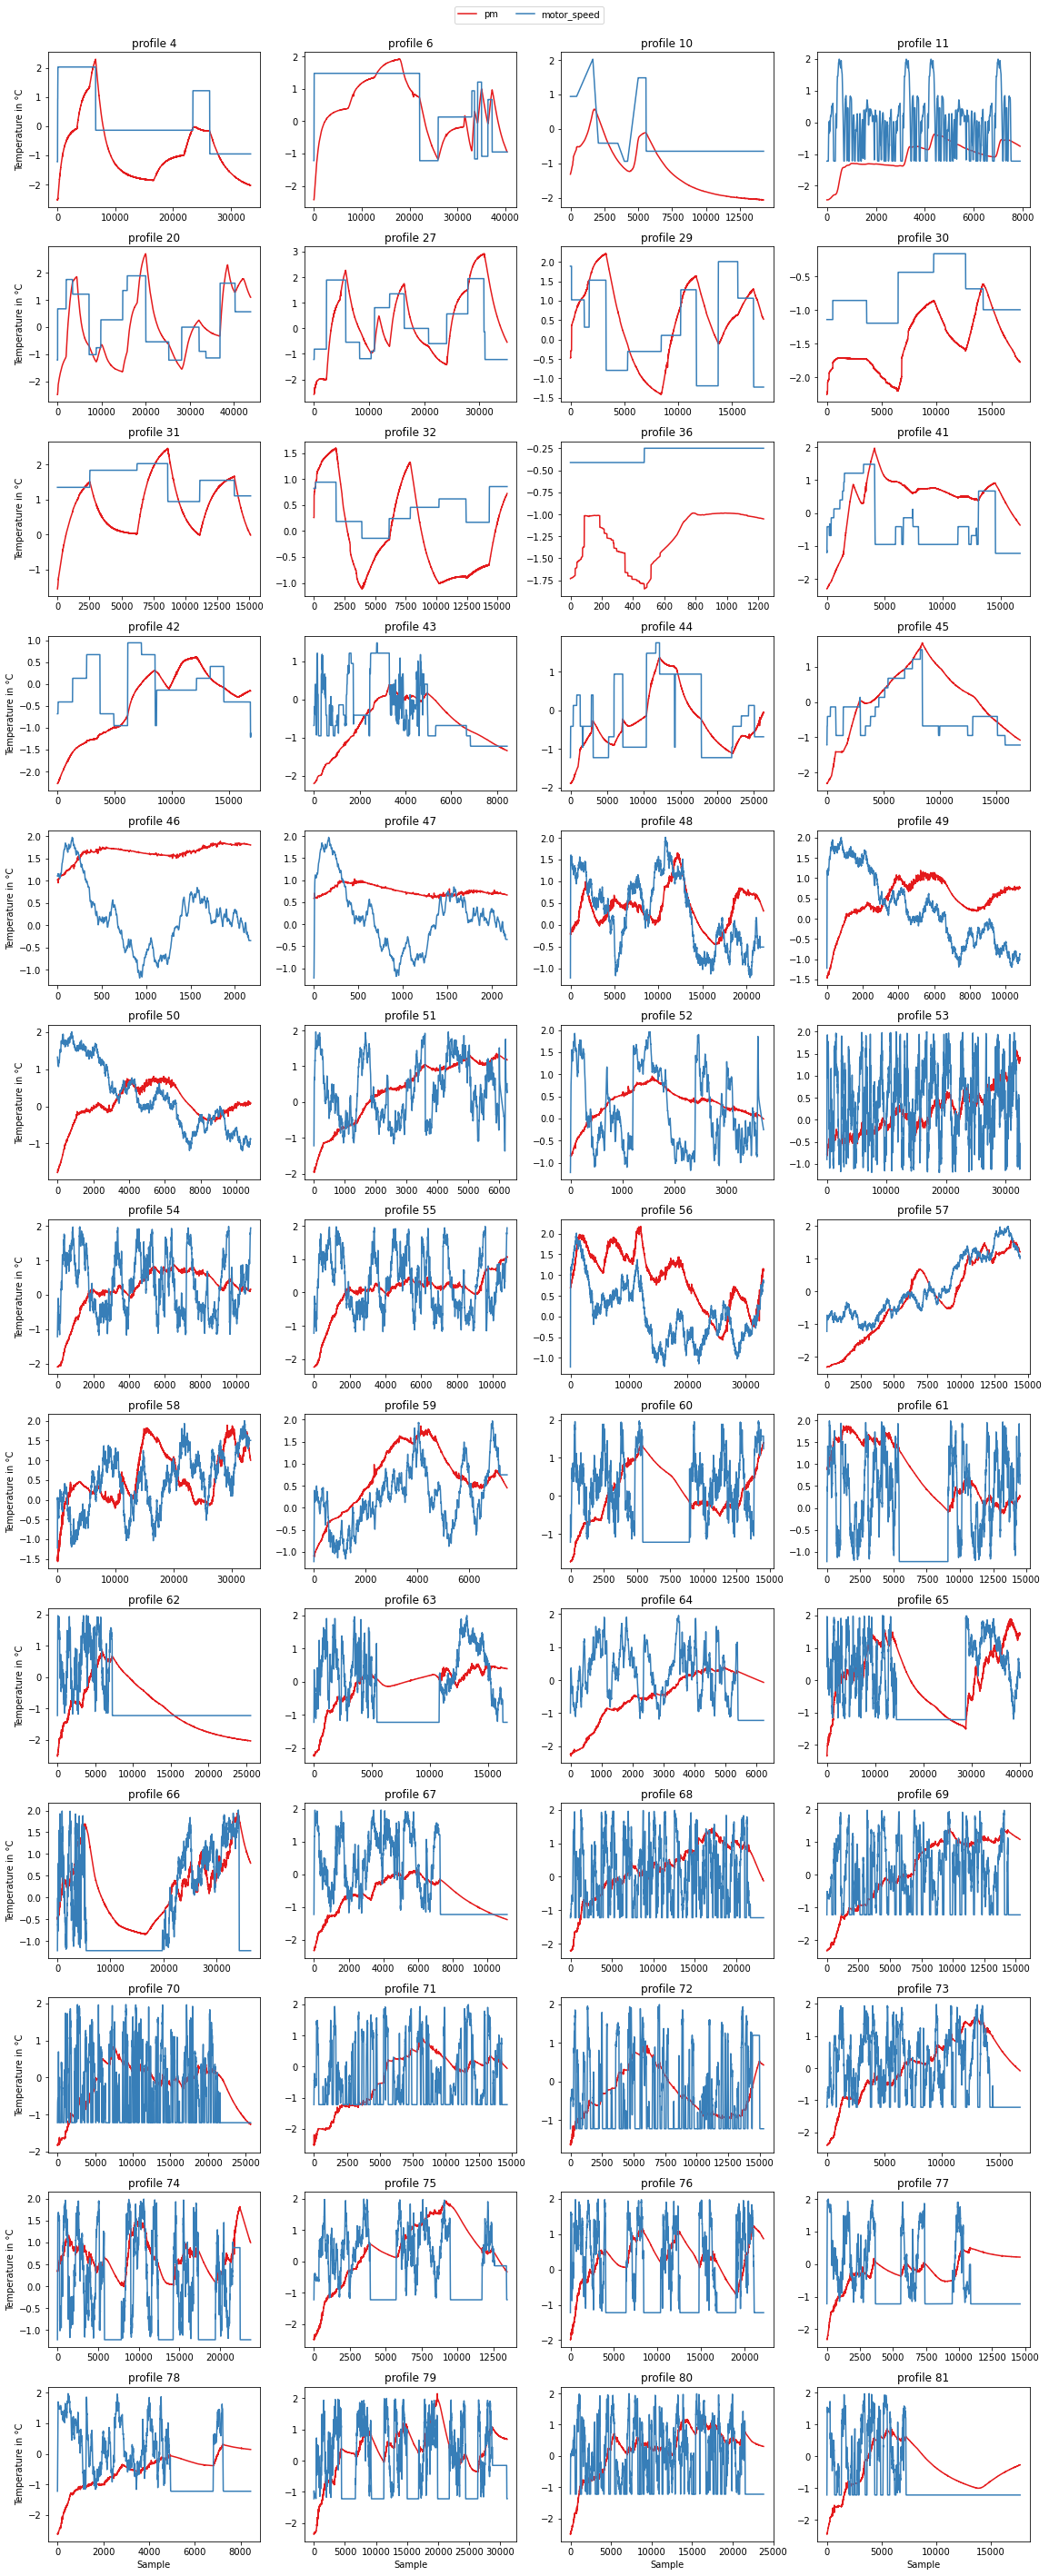

In [21]:
coi = ['pm', 'motor_speed']
parameter_visualizer(pid_grouped, coi, 'Temperature in °C', 4)

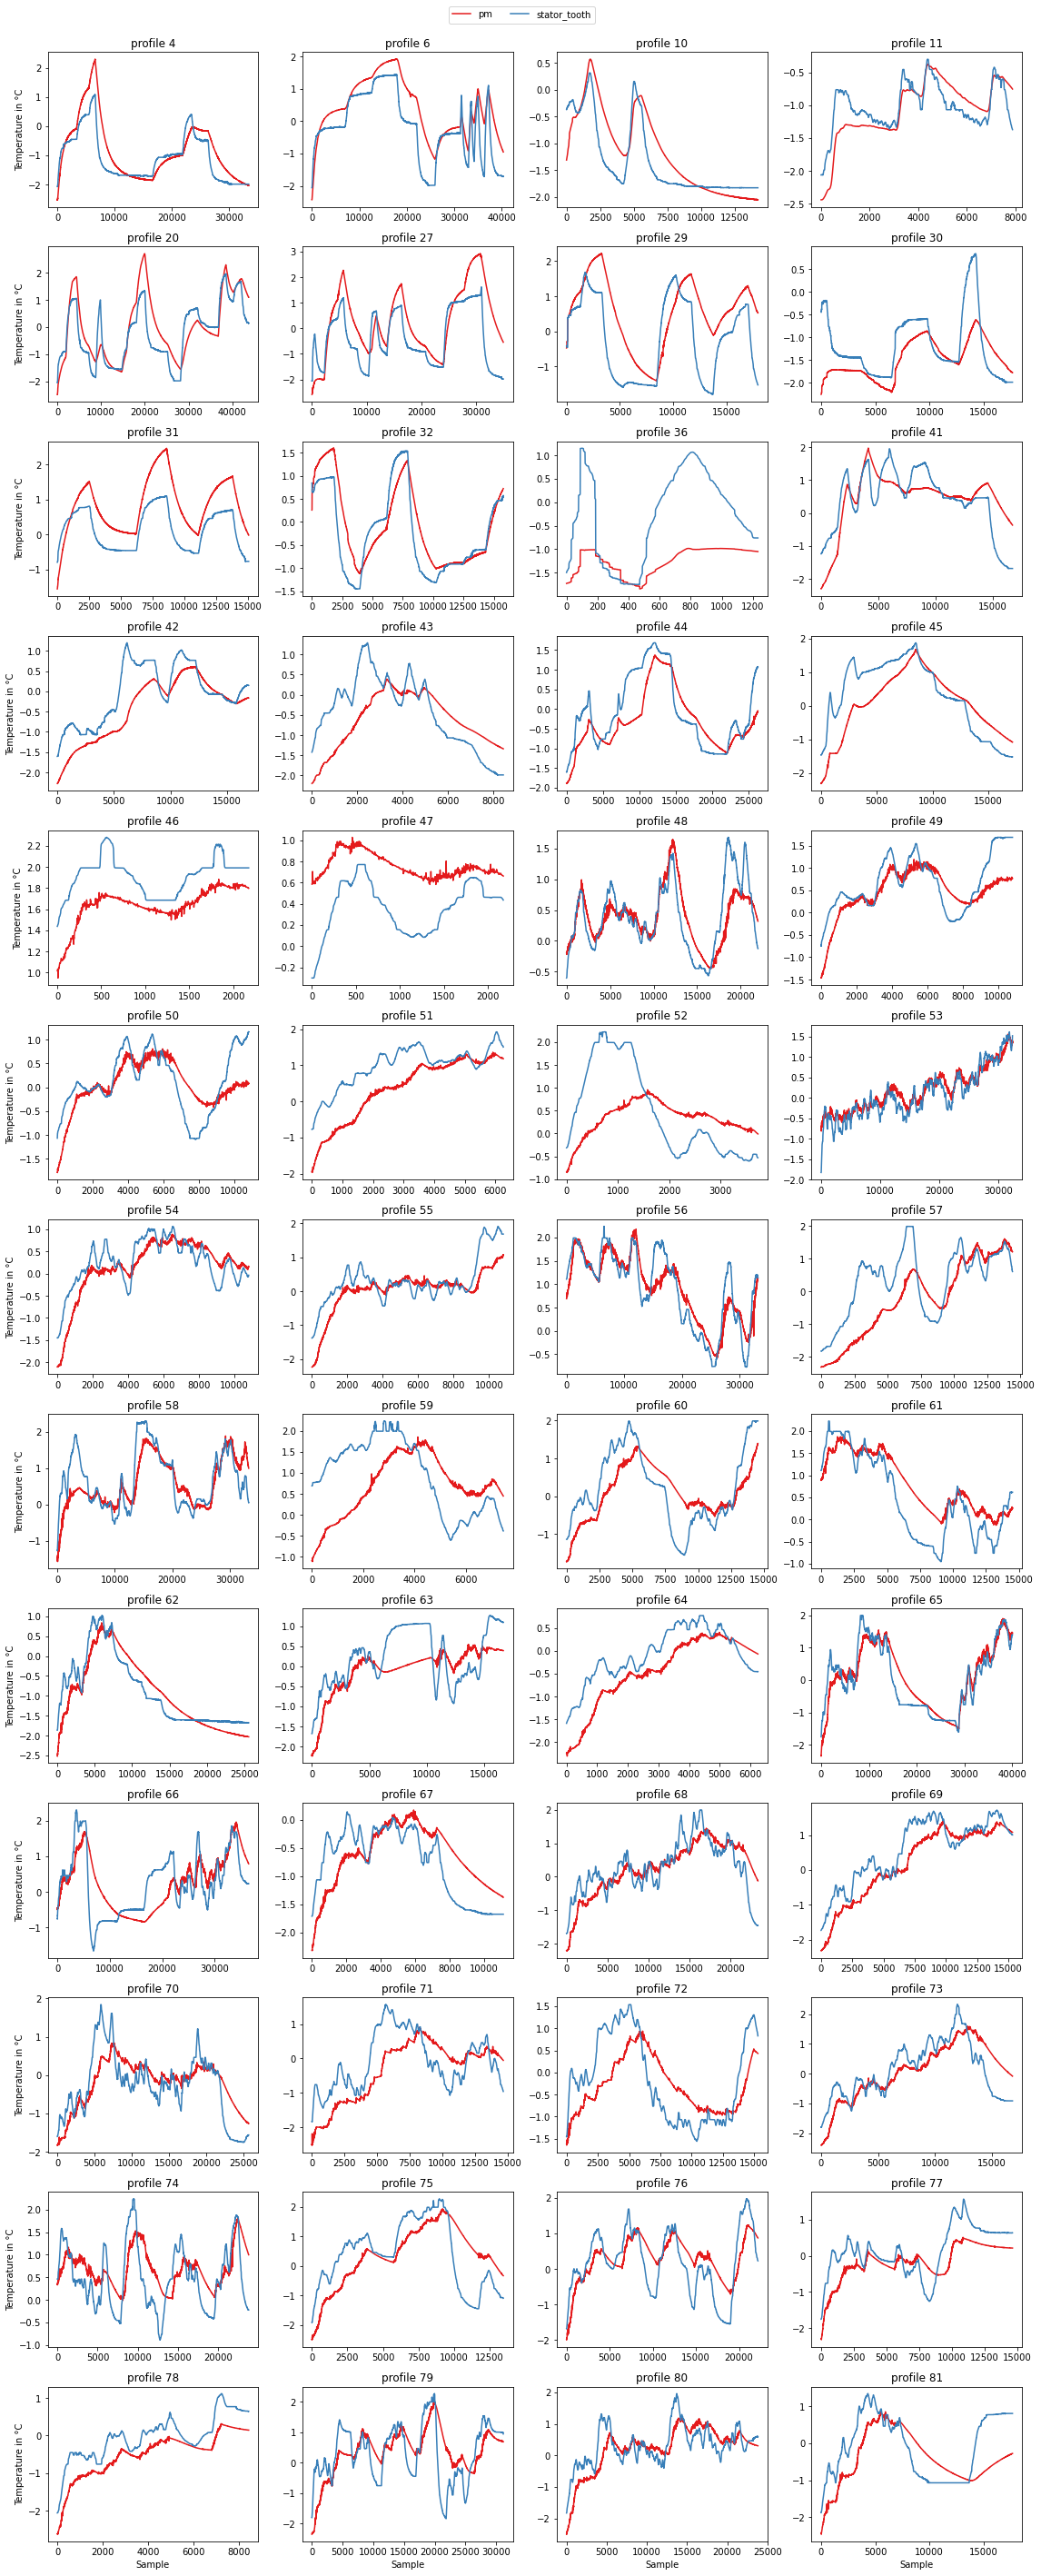

In [22]:
coi = ['pm', 'stator_tooth']
parameter_visualizer(pid_grouped, coi, 'Temperature in °C', 4)

### Correlation 

<AxesSubplot:title={'center':'After Outlier Removal'}>

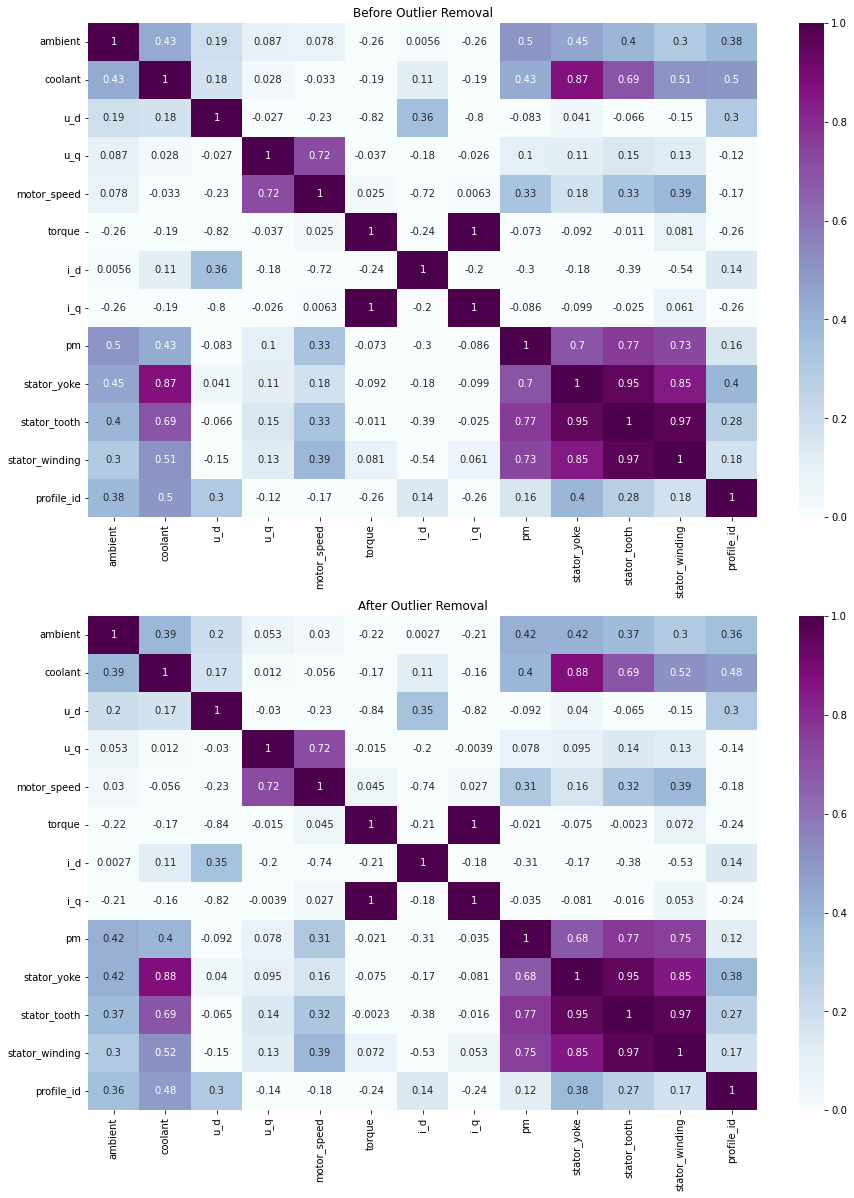

In [23]:
n_cols = 1
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
axes[0].set_title('Before Outlier Removal')
sns.heatmap(data=tx.corr(),vmin=0,vmax=1,cmap="BuPu",annot=True,ax=axes.flatten()[0],)
axes[1].set_title('After Outlier Removal')
sns.heatmap(data=df.corr(),vmin=0,vmax=1,cmap="BuPu",annot=True,ax=axes.flatten()[1])

<Figure size 1440x1440 with 0 Axes>

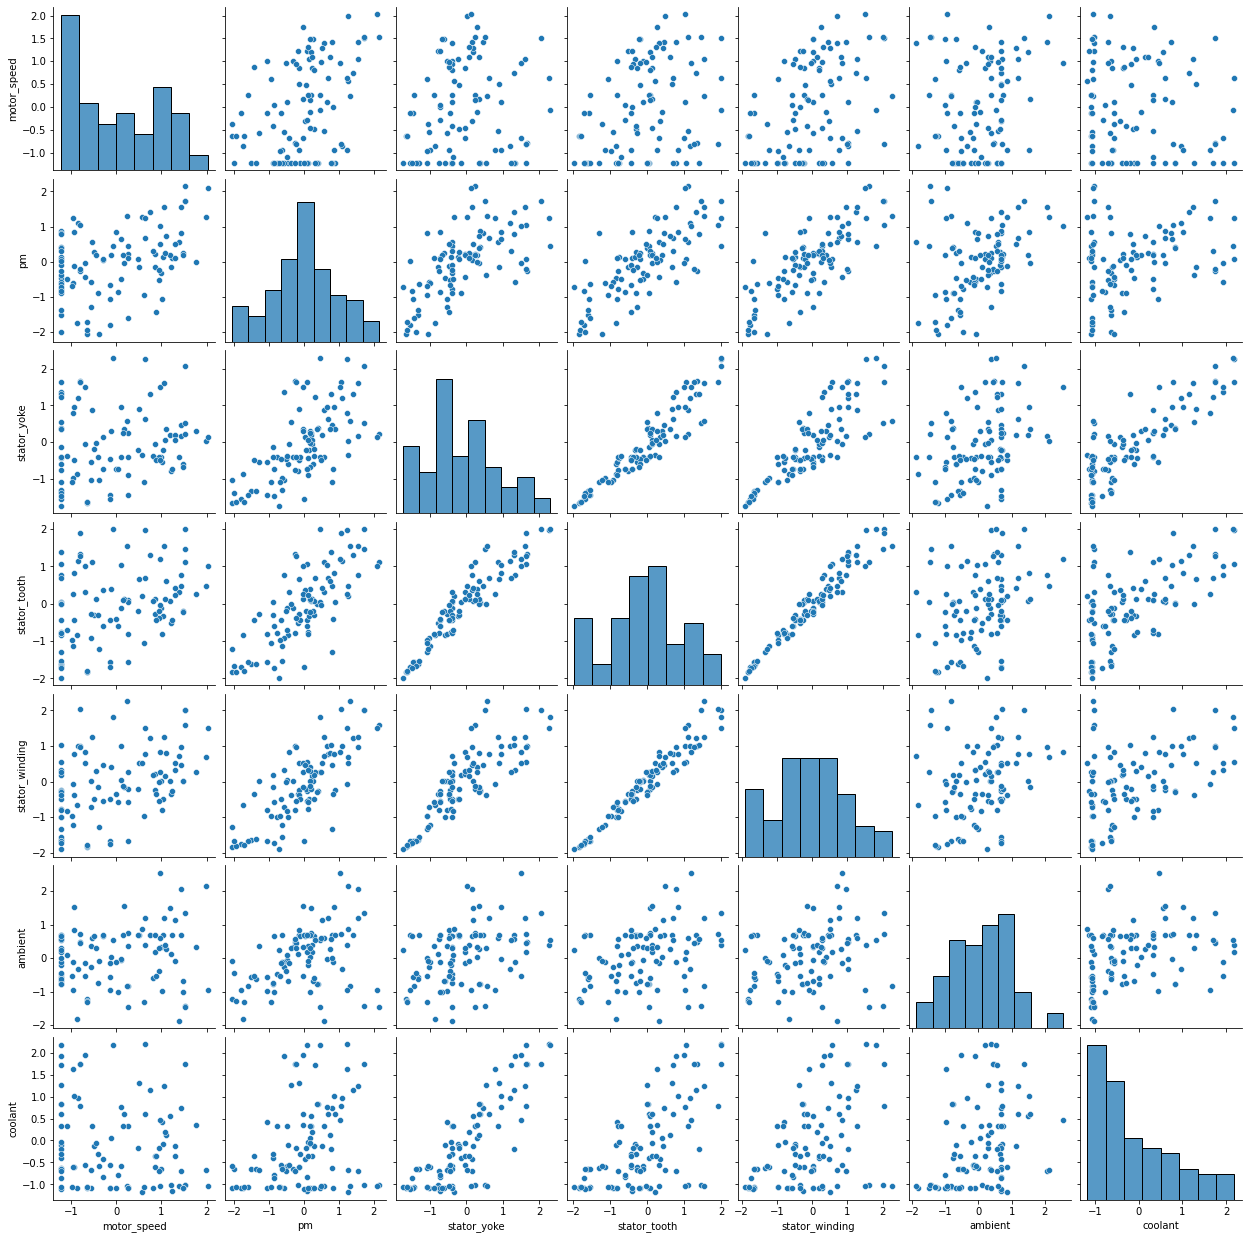

In [24]:
fea = ['motor_speed','pm', 'stator_yoke', 'stator_tooth', 'stator_winding','ambient','coolant']
plt.figure(figsize=(20,20))
sns.pairplot(data=df[fea].sample(100))

<AxesSubplot:>

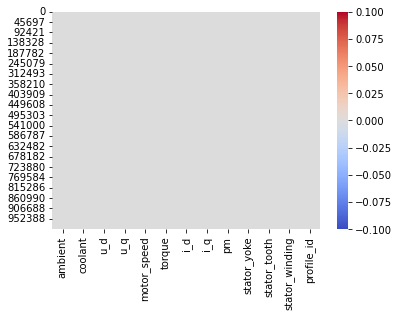

In [25]:

sns.heatmap(data=df.isnull(),cmap='coolwarm')

## Model building

In [26]:
features=['ambient','stator_tooth','coolant','motor_speed']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X=df[features]
y=df.pm

In [29]:
#Scaling 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled,columns=features)

<AxesSubplot:>

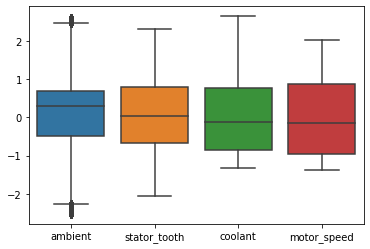

In [30]:
sns.boxplot(data=df[features])

In [31]:
train_X,test_X,train_y,test_y =train_test_split(X,y,test_size=0.25,random_state=10)

In [32]:
train_X, test_X

(         ambient  stator_tooth   coolant  motor_speed
 677267  0.625202      0.572963  0.423598     0.964528
 481683  0.613625      0.252828  0.287552     0.422747
 555850  0.779933      0.332568  0.065930     0.781246
 318867  0.475404      0.855091  0.825108     0.760969
 792149  0.625282      0.575486  0.200780     0.648325
 ...          ...           ...       ...          ...
 617841  0.624235      0.771528  0.620819     0.309333
 443712  0.625388      0.793765  0.823717     0.410289
 881167  0.544936      0.482782  0.381839     0.043908
 760957  0.296424      0.256114  0.228489     0.043908
 345353  0.510772      0.534707  0.415780     0.566551
 
 [719683 rows x 4 columns],
          ambient  stator_tooth   coolant  motor_speed
 192897  0.113638      0.425629  0.066231     0.067810
 25064   0.519321      0.360245  0.060324     0.760966
 310020  0.472384      0.612929  0.191627     0.203253
 537718  0.615693      0.336718  0.135565     0.525249
 863060  0.595849      0.614612  0.

In [33]:
train_y

715722    0.856003
520038   -0.427002
594297   -0.082758
357212    1.479116
830622    0.971945
            ...   
656290    1.392737
482065    1.410340
919650    0.666998
799424   -1.272589
383701    0.811850
Name: pm, Length: 719683, dtype: float64

In [34]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [34]:
import sklearn
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn import neighbors
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [36]:
l_reg = LinearRegression()
l_reg.fit(train_X,train_y)

l_train_acc = (l_reg.score(train_X,train_y))*100
l_test_acc = (l_reg.score(test_X,test_y))*100

print(f"Train accuracy: {l_train_acc}")
# printf("Train accuracy is %f", l_train_acc)
print(f"Test accuracy: {l_test_acc}")

Train accuracy: 66.2260605064275
Test accuracy: 66.27734294541347


In [37]:
Y_pred = l_reg.predict(test_X)
print(test_y.shape, Y_pred.shape)

(239895,) (239895,)


In [38]:
r2_l = r2_score(test_y, Y_pred)*100
rms_l = sqrt(mean_squared_error(test_y, Y_pred))
mae_l = mean_absolute_error(test_y, Y_pred)
print(f"R^2 score of model is {r2_l} %")
print(f"Root mean squared error is {rms_l}")
print(f"Mean absolute error is {mae_l}")

R^2 score of model is 66.27734294541347 %
Root mean squared error is 0.5525094823472219
Mean absolute error is 0.4240088558955608


In [39]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
L_reg = LinearRegression()
L_reg.fit(train_X, train_y)
# evaluate model
scores = cross_val_score(L_reg, train_X, train_y, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred_cv_l = L_reg.predict(test_X)
r2_l_cv = sklearn.metrics.r2_score(test_y, Y_pred_cv_l)*100
print(f'R^2 Score: {r2_l_cv} %')

Score Array list: [0.6639014  0.66251269 0.66236556 0.66394275 0.6638138  0.66251685
 0.66028506 0.66045565 0.66017404 0.66253478]


R^2 Score: 66.27734294541347 %


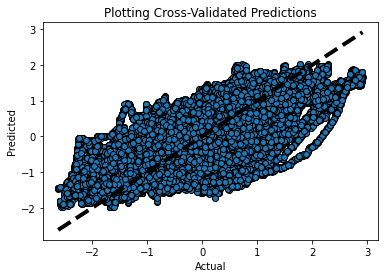

In [40]:
fig, ax = plt.subplots()
ax.scatter(test_y,Y_pred_cv_l, edgecolors=(0, 0, 0))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Plotting Cross-Validated Predictions")
plt.show()

In [41]:
calculation = pd.DataFrame(np.c_[test_y,l_reg.predict(test_X)], columns = ["Original Temperature","Predicted Temperature"])
calculation.head(5)

Original Temperature  Predicted Temperature
0             -1.906668              -0.272248
1             -0.137841              -0.062012
2             -0.341175               0.722261
3             -0.205455              -0.123208
4              0.216175               0.202426

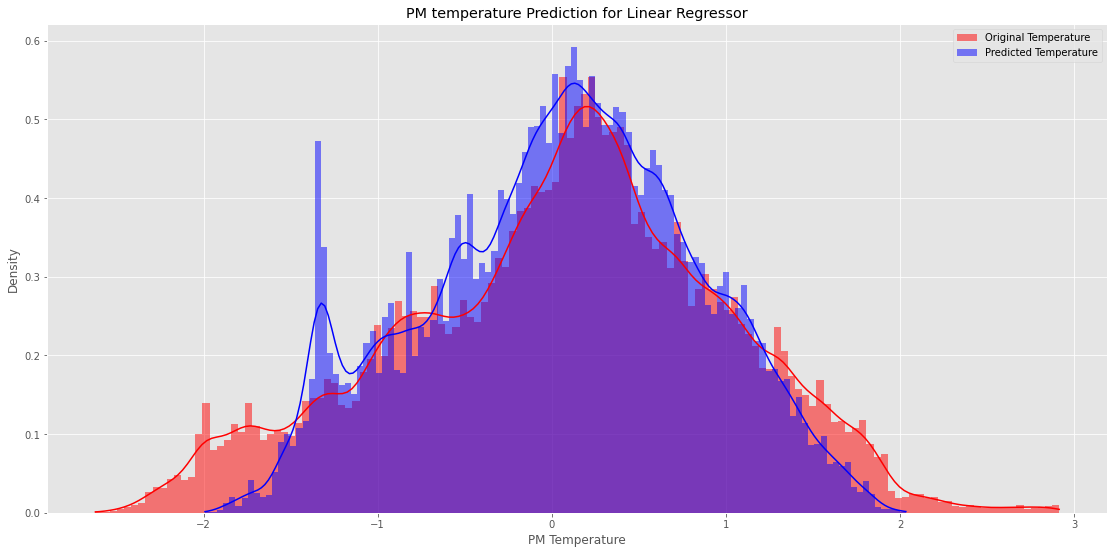

In [42]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(test_y, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(Y_pred, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for Linear Regressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

### K-Nearest Neighbour Regressor

In [43]:
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(train_X, train_y)  #fit the model
    knn_pred=model.predict(test_X) #make prediction on test set
    error = sqrt(mean_squared_error(test_y,knn_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.10377400187339553
RMSE value for k=  2 is: 0.09930813695351724
RMSE value for k=  3 is: 0.1002472890700227
RMSE value for k=  4 is: 0.10276607793079437
RMSE value for k=  5 is: 0.1055025357740956
RMSE value for k=  6 is: 0.10859413126872107
RMSE value for k=  7 is: 0.11183772067834968
RMSE value for k=  8 is: 0.11520274489638607
RMSE value for k=  9 is: 0.11841410940039981
RMSE value for k=  10 is: 0.12147064732661493


<AxesSubplot:>

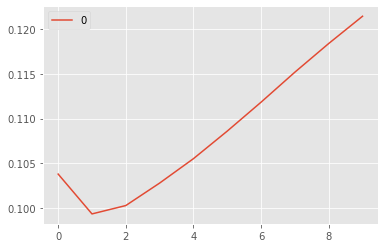

In [44]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [45]:
k_reg = KNeighborsRegressor(n_neighbors=2,p=2,metric='minkowski')
k_reg.fit(train_X,train_y)

k_train_acc = (k_reg.score(train_X,train_y))*100
k_test_acc = (k_reg.score(test_X,test_y))*100

print(f"Train accuracy: {k_train_acc}")
print(f"Test accuracy: {k_test_acc}")

Train accuracy: 99.69888305834256
Test accuracy: 98.9105382602296


In [46]:
Y_pred_k = k_reg.predict(test_X)
print(test_y.shape, Y_pred_k.shape)

(239895,) (239895,)


In [47]:
r2_k = r2_score(test_y, Y_pred_k)*100
rms_k = sqrt(mean_squared_error(test_y, Y_pred_k))
mae_k = mean_absolute_error(test_y, Y_pred_k)
print(f"R^2 score of model is {r2_k} %")
print(f"Root mean squared error is {rms_k}")
print(f"Mean absolute error is {mae_k}")

R^2 score of model is 98.9105382602296 %
Root mean squared error is 0.09930813695351724
Mean absolute error is 0.024408203640237262


In [48]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
K_reg = KNeighborsRegressor()
K_reg.fit(train_X, train_y)
# evaluate model
scores = cross_val_score(K_reg, train_X, train_y, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred_cv_k = K_reg.predict(test_X)
r2_k_cv = sklearn.metrics.r2_score(test_y, Y_pred_cv_k)*100
print(f'R^2 Score: {r2_k_cv} %')

Score Array list: [0.98686996 0.98617533 0.98676174 0.98702867 0.98720341 0.98616774
 0.98639767 0.98676248 0.9863673  0.98632479]


R^2 Score: 98.77038795054224 %


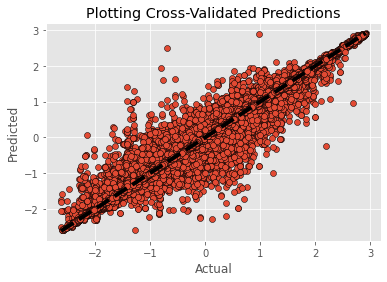

In [49]:
fig, ax = plt.subplots()
ax.scatter(test_y,Y_pred_cv_k, edgecolors=(0, 0, 0))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Plotting Cross-Validated Predictions")
plt.show()

In [50]:
calculation_1 = pd.DataFrame(np.c_[test_y,k_reg.predict(test_X)], columns = ["Original Temperature","Predicted Temperature"])
calculation_1.head(5)

Original Temperature  Predicted Temperature
0             -1.906668              -1.905766
1             -0.137841              -0.135688
2             -0.341175              -0.348359
3             -0.205455              -0.203328
4              0.216175               0.218027

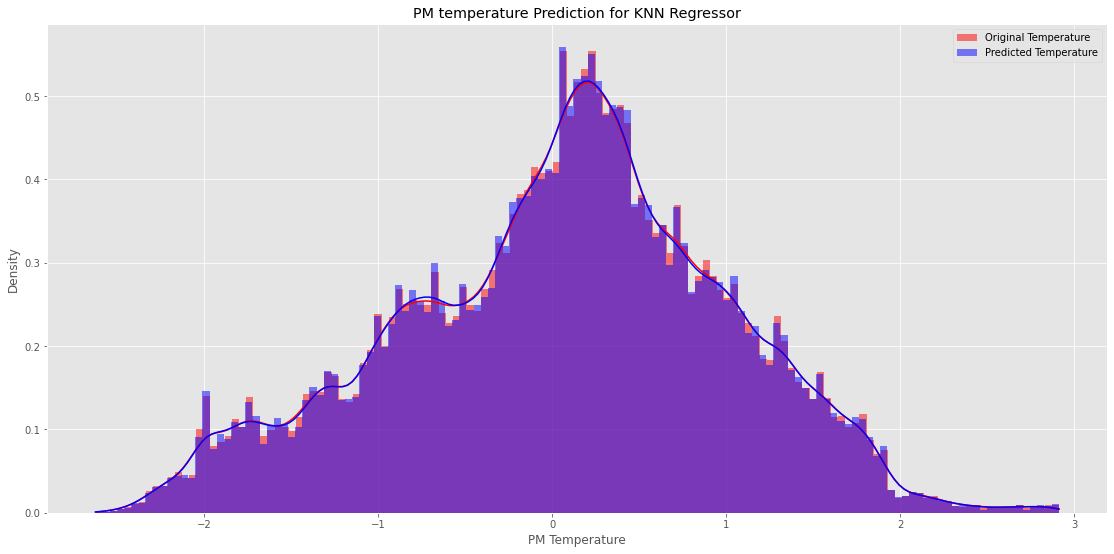

In [51]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(test_y, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(Y_pred_k, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for KNN Regressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

## Random Forest Regressor

In [52]:
r_reg = RandomForestRegressor(n_estimators=100)
r_reg.fit(train_X, train_y)

r_train_acc = (r_reg.score(train_X,train_y))*100
r_test_acc = (r_reg.score(test_X,test_y))*100

print(f"Train accuracy: {r_train_acc}")
print(f"Test accuracy: {r_test_acc}")

Train accuracy: 99.93966910744865
Test accuracy: 99.58123155075647


In [54]:
Y_pred_r = r_reg.predict(test_X)
print(test_y.shape, Y_pred_r.shape)

(239895,) (239895,)


In [55]:
r2_r = r2_score(test_y, Y_pred_r)*100
rms_r = sqrt(mean_squared_error(test_y, Y_pred_r))
mae_r = mean_absolute_error(test_y, Y_pred_r)
print(f"R^2 score of model is {r2_r} %")
print(f"Root mean squared error is {rms_r}")
print(f"Mean absolute error is {mae_r}")

R^2 score of model is 99.58123155075647 %
Root mean squared error is 0.061569527370438644
Mean absolute error is 0.0181769733084356


In [56]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=100, shuffle=True)
# create model
R_reg = RandomForestRegressor()
R_reg.fit(train_X, train_y)
# evaluate model
scores = cross_val_score(R_reg, train_X, train_y, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred_cv_r = R_reg.predict(test_X)
r2_r_cv = sklearn.metrics.r2_score(test_y, Y_pred_cv_r)*100
print(f'R^2 Score: {r2_r_cv} %')

Score Array list: [0.99468016 0.99491001 0.99498388 0.99482516 0.99518607]


R^2 Score: 99.57587321932131 %


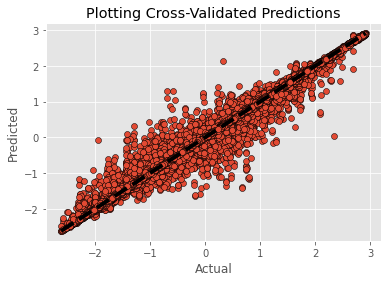

In [57]:
fig, ax = plt.subplots()
ax.scatter(test_y,Y_pred_cv_r, edgecolors=(0, 0, 0))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Plotting Cross-Validated Predictions")
plt.show()

In [58]:
calculation_2 = pd.DataFrame(np.c_[test_y,r_reg.predict(test_X)], columns = ["Original Temperature","Predicted Temperature"])
calculation_2.head(100)


Original Temperature  Predicted Temperature
0              -1.906668              -1.897955
1              -0.137841              -0.139552
2              -0.341175              -0.344890
3              -0.205455              -0.207137
4               0.216175               0.217876
..                   ...                    ...
95             -0.828031              -0.825997
96             -1.806377              -1.815536
97             -0.654346              -0.661389
98             -1.667681              -1.672215
99             -0.236959              -0.237247

[100 rows x 2 columns]

In [59]:
calculation_2.shape

(239895, 2)

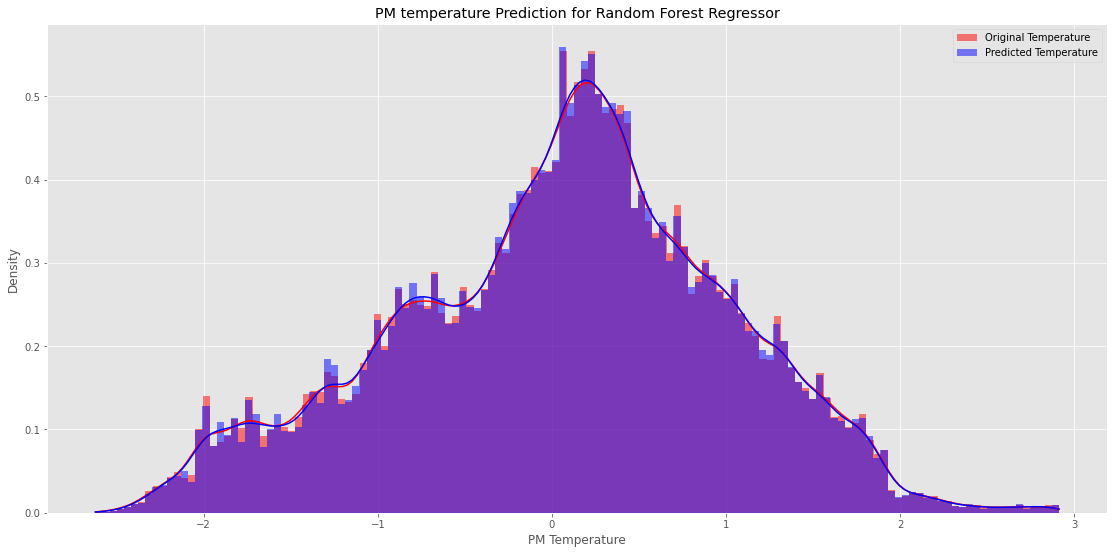

In [60]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(test_y, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(Y_pred_r, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for Random Forest Regressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

### AdaBoostRegressor

In [35]:
dtree = DecisionTreeRegressor()
a_reg = AdaBoostRegressor(n_estimators=100, base_estimator=dtree,learning_rate=1)
a_reg.fit(train_X, train_y)

a_train_acc = (a_reg.score(train_X,train_y))*100
a_test_acc = (a_reg.score(test_X,test_y))*100

print(f"Train accuracy: {a_train_acc}")
print(f"Test accuracy: {a_test_acc}")

Train accuracy: 99.99990518697264
Test accuracy: 99.69947688988475


In [36]:
y_pred_a = a_reg.predict(test_X)
print(test_y.shape, y_pred_a.shape)

(239895,) (239895,)


In [63]:
r2_a = r2_score(test_y, y_pred_a)*100
rms_a = sqrt(mean_squared_error(test_y, y_pred_a))
mae_a = mean_absolute_error(test_y, y_pred_a)
print(f"R^2 score of model is {r2_a} %")
print(f"Root mean squared error is {rms_a}")
print(f"Mean absolute error is {mae_a}")

R^2 score of model is 99.68390630002561 %
Root mean squared error is 0.053491744673934735
Mean absolute error is 0.009363722318087797


In [64]:
cv = KFold(n_splits=5, random_state=100, shuffle=True)
# create model
A_reg = AdaBoostRegressor(n_estimators=50, base_estimator=dtree,learning_rate=1)
A_reg.fit(train_X, train_y)
# evaluate model
scores = cross_val_score(A_reg, train_X, train_y, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred_cv_a = A_reg.predict(test_X)
r2_a_cv = sklearn.metrics.r2_score(test_y, Y_pred_cv_a)*100
print(f'R^2 Score: {r2_a_cv} %')

Score Array list: [0.99601694 0.99640945 0.99642675 0.99580192 0.99612809]


R^2 Score: 99.70391968107248 %


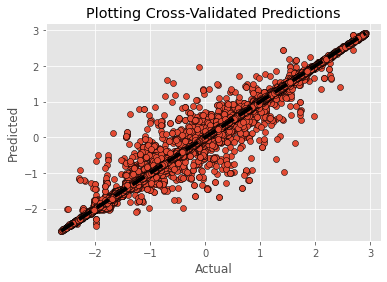

In [65]:
fig, ax = plt.subplots()
ax.scatter(test_y,Y_pred_cv_a, edgecolors=(0, 0, 0))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Plotting Cross-Validated Predictions")
plt.show()

In [66]:
calculation_3 = pd.DataFrame(np.c_[test_y,a_reg.predict(test_X)], columns = ["Original Temperature","Predicted Temperature"])
calculation_3.head(100)


Original Temperature  Predicted Temperature
0              -1.906668              -1.905302
1              -0.137841              -0.137775
2              -0.341175              -0.343035
3              -0.205455              -0.203754
4               0.216175               0.217390
..                   ...                    ...
95             -0.828031              -0.826354
96             -1.806377              -1.805950
97             -0.654346              -0.657760
98             -1.667681              -1.669054
99             -0.236959              -0.237187

[100 rows x 2 columns]

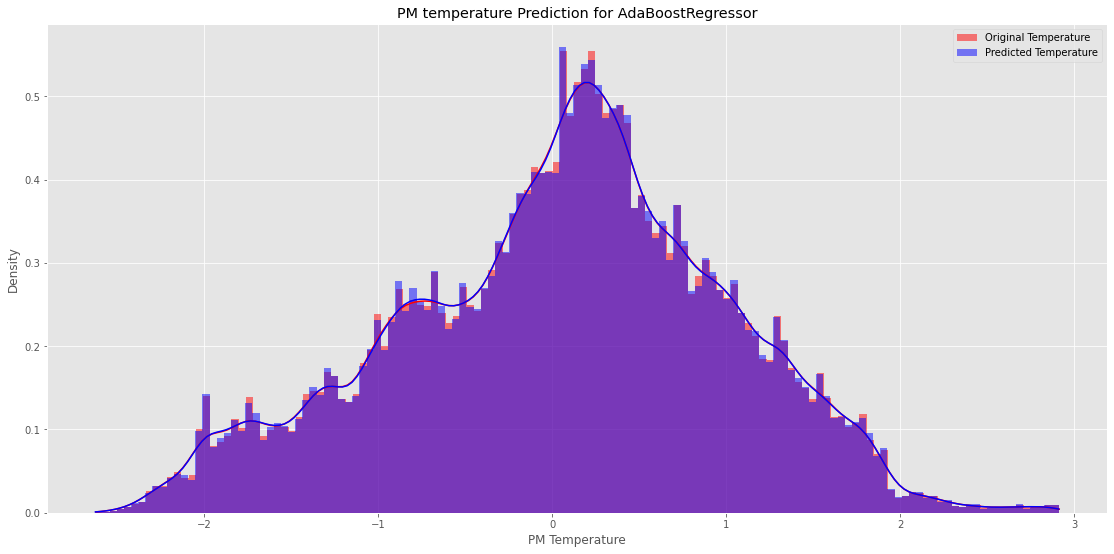

In [67]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(test_y, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(y_pred_a, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for AdaBoostRegressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

### XGB Regressor

In [68]:
x_reg = XGBRegressor()
x_reg.fit(train_X,train_y)

x_train_acc = (x_reg.score(train_X,train_y))*100
x_test_acc = (x_reg.score(test_X,test_y))*100

print(f"Train accuracy: {x_train_acc}")
print(f"Test accuracy: {x_test_acc}")

Train accuracy: 94.93419499488212
Test accuracy: 94.78863836729774


In [69]:
Y_pred_x = x_reg.predict(test_X)
print(test_y.shape, Y_pred_x.shape)

(239895,) (239895,)


In [70]:
r2_x = r2_score(test_y, Y_pred_x)*100
rms_x = sqrt(mean_squared_error(test_y, Y_pred_x))
mae_x = mean_absolute_error(test_y, Y_pred_x)
print(f"R^2 score of model is {r2_x} %")
print(f"Root mean squared error is {rms_x}")
print(f"Mean absolute error is {mae_x}")

R^2 score of model is 94.78863836729774 %
Root mean squared error is 0.21719731319395916
Mean absolute error is 0.15037702193553845


In [71]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
X_reg = XGBRegressor()
X_reg.fit(train_X, train_y)
# evaluate model
scores = cross_val_score(X_reg, train_X, train_y, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred_cv_x = X_reg.predict(test_X)
r2_x_cv = sklearn.metrics.r2_score(test_y, Y_pred_cv_x)*100
print(f'R^2 Score: {r2_x_cv} %')

Score Array list: [0.94714268 0.94777493 0.94444511 0.94726951 0.94662967 0.94679753
 0.94565851 0.94607446 0.94531188 0.94559221]


R^2 Score: 94.78863836729774 %


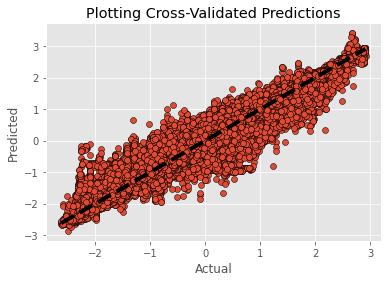

In [72]:
fig, ax = plt.subplots()
ax.scatter(test_y,Y_pred_cv_x, edgecolors=(0, 0, 0))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Plotting Cross-Validated Predictions")
plt.show()

In [73]:
calculation_4 = pd.DataFrame(np.c_[test_y,x_reg.predict(test_X)], columns = ["Original Temperature","Predicted Temperature"])
calculation_4.head(100)

Original Temperature  Predicted Temperature
0              -1.906668              -1.785244
1              -0.137841              -0.215701
2              -0.341175              -0.406423
3              -0.205455              -0.289026
4               0.216175               0.266244
..                   ...                    ...
95             -0.828031              -0.801162
96             -1.806377              -1.786594
97             -0.654346              -0.575629
98             -1.667681              -1.614664
99             -0.236959              -0.260414

[100 rows x 2 columns]

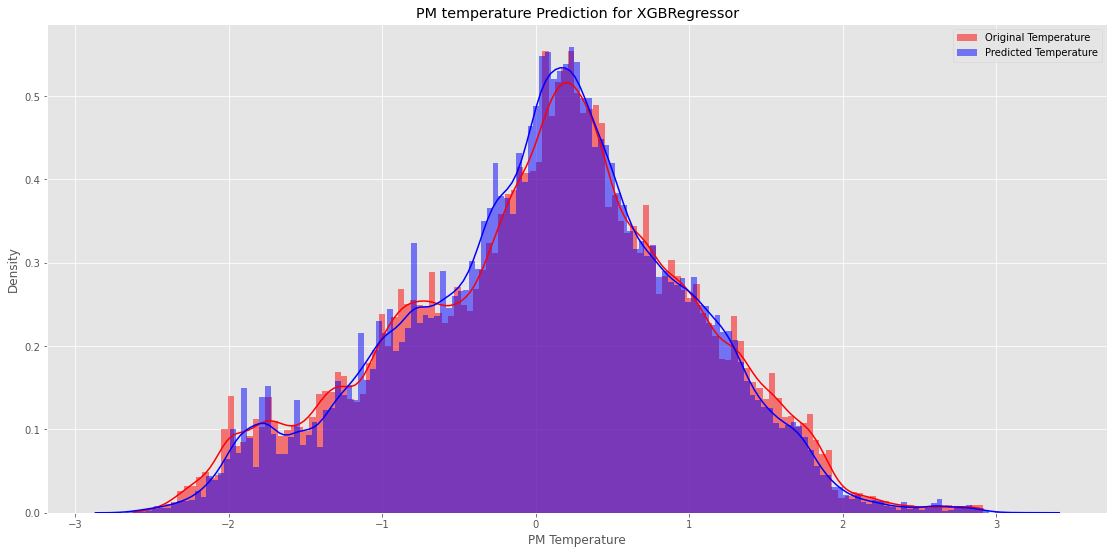

In [74]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(test_y, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(Y_pred_x, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for XGBRegressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

### Decision Tree Regressor

In [75]:
regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(train_X,train_y)

d_train_acc = (regressor_dt.score(train_X,train_y))*100
d_test_acc = (regressor_dt.score(test_X,test_y))*100

print(f"Train accuracy: {d_train_acc}")
print(f"Test accuracy: {d_test_acc}")

Train accuracy: 99.9999955090962
Test accuracy: 99.15257426586776


In [76]:
Y_pred_dt = regressor_dt.predict(test_X)
print(test_y.shape, Y_pred_dt.shape)

(239895,) (239895,)


In [77]:
r2_dt = r2_score(test_y, Y_pred_dt)*100
rms_dt = sqrt(mean_squared_error(test_y, Y_pred_dt))
mae_dt = mean_absolute_error(test_y, Y_pred_dt)
print(f"R^2 score of model is {r2_dt} %")
print(f"Root mean squared error is {rms_dt}")
print(f"Mean absolute error is {mae_dt}")

R^2 score of model is 99.15257426586776 %
Root mean squared error is 0.08758498644167965
Mean absolute error is 0.016735479857794045


In [78]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
regressor_DT = DecisionTreeRegressor()
regressor_DT.fit(train_X, train_y)
# evaluate model
scores = cross_val_score(regressor_DT, train_X, train_y, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred_cv_dt = regressor_DT.predict(test_X)
r2_dt_cv = sklearn.metrics.r2_score(test_y, Y_pred_cv_dt)*100
print(f'R^2 Score: {r2_dt_cv} %')

Score Array list: [0.98998272 0.99029789 0.99087108 0.99095228 0.99029489 0.99022779
 0.99020596 0.99068154 0.99130215 0.99041682]


R^2 Score: 99.164357579798 %


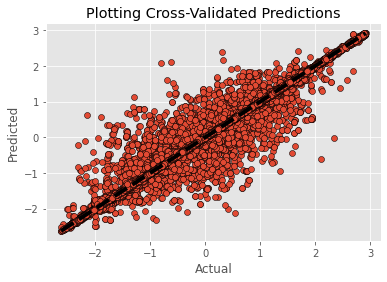

In [79]:
fig, ax = plt.subplots()
ax.scatter(test_y,Y_pred_cv_dt, edgecolors=(0, 0, 0))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Plotting Cross-Validated Predictions")
plt.show()

In [80]:
calculation_5 = pd.DataFrame(np.c_[test_y,regressor_dt.predict(test_X)], columns = ["Original Temperature","Predicted Temperature"])
calculation_5.head(100)

Original Temperature  Predicted Temperature
0              -1.906668              -1.905302
1              -0.137841              -0.134787
2              -0.341175              -0.343035
3              -0.205455              -0.205561
4               0.216175               0.218400
..                   ...                    ...
95             -0.828031              -0.827552
96             -1.806377              -1.805873
97             -0.654346              -0.660550
98             -1.667681              -1.665009
99             -0.236959              -0.239551

[100 rows x 2 columns]

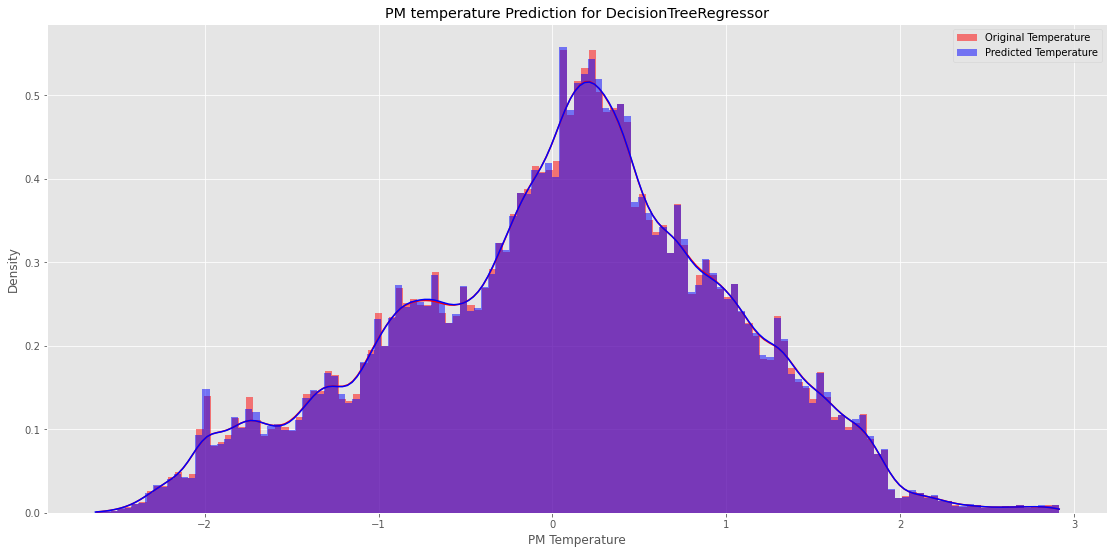

In [81]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(test_y, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(Y_pred_dt, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for DecisionTreeRegressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

### Polynomial regression

In [82]:
lr = LinearRegression()

In [83]:
import operator
from sklearn.preprocessing import PolynomialFeatures

In [84]:
polynomial_features= PolynomialFeatures(degree=2)
xtrain_poly = polynomial_features.fit_transform(train_X)
xtest_poly = polynomial_features.fit_transform(test_X)

In [85]:

lr.fit(xtrain_poly,train_y)

p_train_acc = (lr.score(xtrain_poly,train_y))*100
p_test_acc = (lr.score(xtest_poly,test_y))*100

print(f"Train accuracy: {p_train_acc}")
print(f"Test accuracy: {p_test_acc}")

Train accuracy: 71.97606438021356
Test accuracy: 71.93369402368141


In [86]:
Y_pred_p = lr.predict(xtest_poly)
print(test_y.shape, Y_pred_p.shape)

(239895,) (239895,)


In [87]:
r2_p = r2_score(test_y, Y_pred_p)*100
rms_p = sqrt(mean_squared_error(test_y, Y_pred_p))
mae_p = mean_absolute_error(test_y, Y_pred_p)
print(f"R^2 score of model is {r2_p} %")
print(f"Root mean squared error is {rms_p}")
print(f"Mean absolute error is {mae_p}")

R^2 score of model is 71.93369402368141 %
Root mean squared error is 0.5040475065743559
Mean absolute error is 0.3854851994953372


In [88]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
Lr = LinearRegression()
Lr.fit(xtrain_poly, train_y)
# evaluate model
scores = cross_val_score(Lr, xtrain_poly, train_y, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred_cv_p= Lr.predict(xtest_poly)
r2_p_cv = sklearn.metrics.r2_score(test_y, Y_pred_cv_p)*100
print(f'R^2 Score: {r2_p_cv} %')

Score Array list: [0.72142544 0.72232385 0.71887672 0.72005665 0.72055654 0.71807273
 0.71797957 0.71860309 0.71874164 0.72079043]


R^2 Score: 71.93369402368141 %


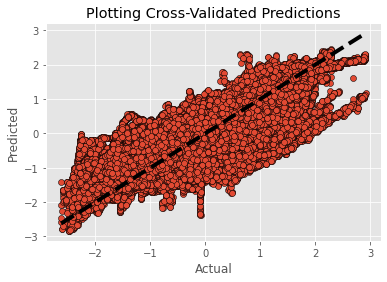

In [89]:
fig, ax = plt.subplots()
ax.scatter(test_y,Y_pred_cv_p, edgecolors=(0, 0, 0))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Plotting Cross-Validated Predictions")
plt.show()

In [90]:
calculation_6 = pd.DataFrame(np.c_[test_y,lr.predict(xtest_poly)], columns = ["Original Temperature","Predicted Temperature"])
calculation_6.head(10)

Original Temperature  Predicted Temperature
0             -1.906668              -0.323710
1             -0.137841              -0.156475
2             -0.341175               0.446440
3             -0.205455              -0.314033
4              0.216175               0.344806
5              0.657006               1.500968
6             -0.550930              -0.929622
7              1.678933               0.605632
8              0.758280               0.502366
9              0.985152               1.011507

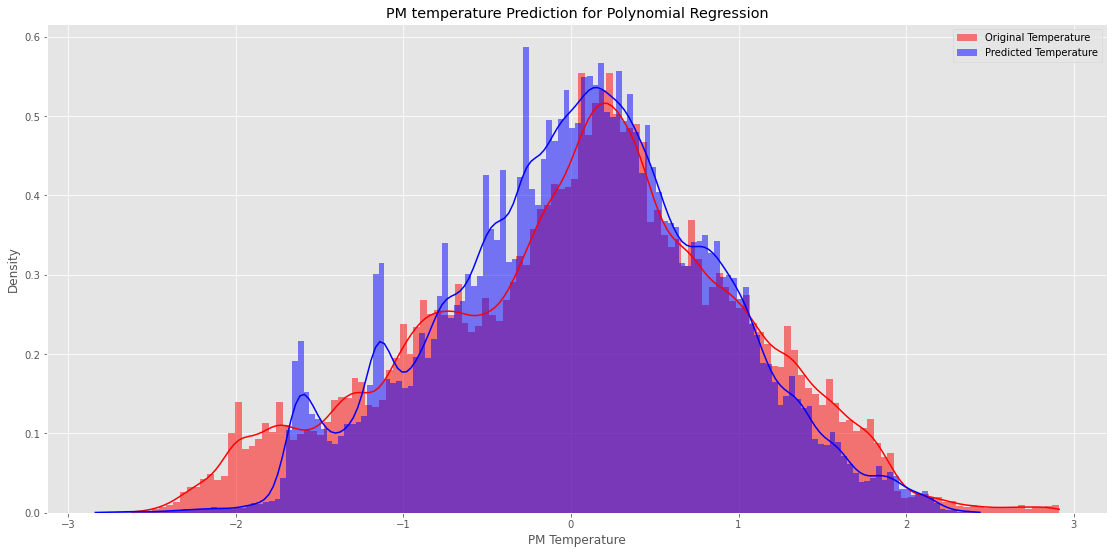

In [92]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(test_y, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(Y_pred_p, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for Polynomial Regression") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

In [93]:
models = pd.DataFrame({
    'Algorithm': ['Linear Regression','K-Nearest Neighbours Regressor','Random Forest Regressor','AdaBoost Regressor','XGBoost Regressor', 
             'Decision Tree Regressor','Polynomial Regressor'  ],
    'Training Accuracy' : [l_train_acc, k_train_acc, r_train_acc, a_train_acc,x_train_acc,d_train_acc,p_train_acc],
    'Testing Accuracy' : [l_test_acc, k_test_acc, r_test_acc, a_test_acc,x_test_acc,d_test_acc,p_test_acc],
    'RMS Score' : [rms_l, rms_k, rms_r, rms_a,rms_x,rms_dt,rms_p],
    'MAE Score' : [mae_l, mae_k, mae_r, mae_a,mae_x,mae_dt,mae_p],
    'R^2 Score': [ r2_l, r2_k, r2_r, r2_a,r2_x,r2_dt,r2_p],
    'CV R^2 Score': [r2_l_cv, r2_k_cv, r2_r_cv, r2_a_cv,r2_x_cv,r2_dt_cv,r2_p_cv]
})

models.sort_values(by = ['Testing Accuracy','Training Accuracy', 'RMS Score', 'MAE Score', 'R^2 Score','CV R^2 Score'], 
                   ascending = False)

Algorithm  Training Accuracy  Testing Accuracy  \
3              AdaBoost Regressor          99.999924         99.683906   
2         Random Forest Regressor          99.939669         99.581232   
5         Decision Tree Regressor          99.999996         99.152574   
1  K-Nearest Neighbours Regressor          99.698883         98.910538   
4               XGBoost Regressor          94.934195         94.788638   
6            Polynomial Regressor          71.976064         71.933694   
0               Linear Regression          66.226061         66.277343   

   RMS Score  MAE Score  R^2 Score  CV R^2 Score  
3   0.053492   0.009364  99.683906     99.703920  
2   0.061570   0.018177  99.581232     99.575873  
5   0.087585   0.016735  99.152574     99.164358  
1   0.099308   0.024408  98.910538     98.770388  
4   0.217197   0.150377  94.788638     94.788638  
6   0.504048   0.385485  71.933694     71.933694  
0   0.552509   0.424009  66.277343     66.277343

### Algorithm vs. R^2 Score

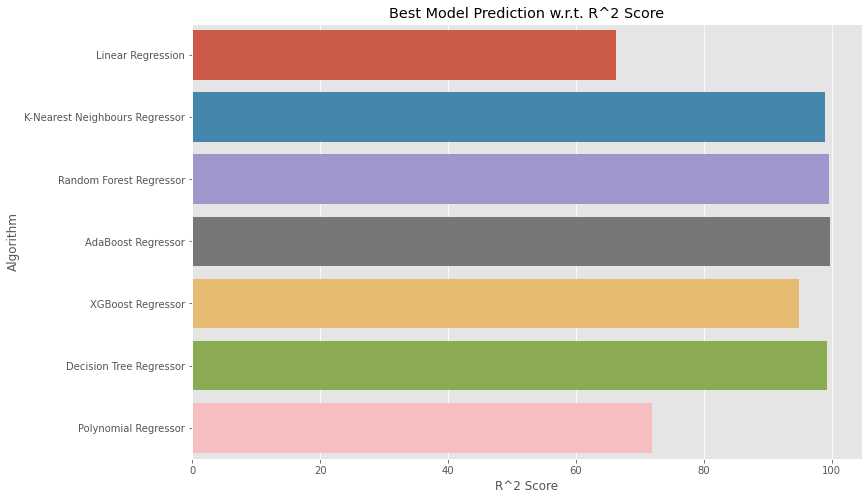

In [94]:
plt.style.use('ggplot') 
plt.figure(figsize=(12,8))
sns.barplot(y='Algorithm',x='R^2 Score',data=models)
plt.title("Best Model Prediction w.r.t. R^2 Score") 
plt.show()

### Algorithm vs. CV R^2 Score

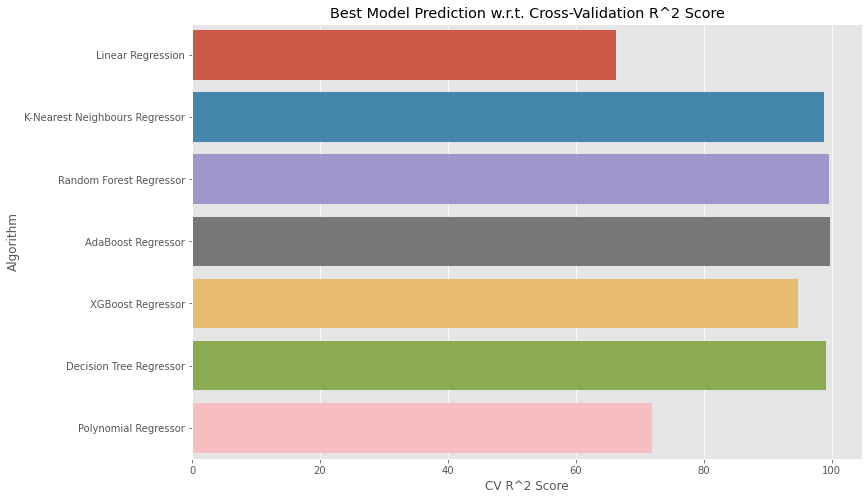

In [95]:
plt.style.use('ggplot') 
plt.figure(figsize=(12,8))
sns.barplot(y='Algorithm',x='CV R^2 Score',data=models)
plt.title("Best Model Prediction w.r.t. Cross-Validation R^2 Score") 
plt.show()

### Algorithm vs. Training Accuracy

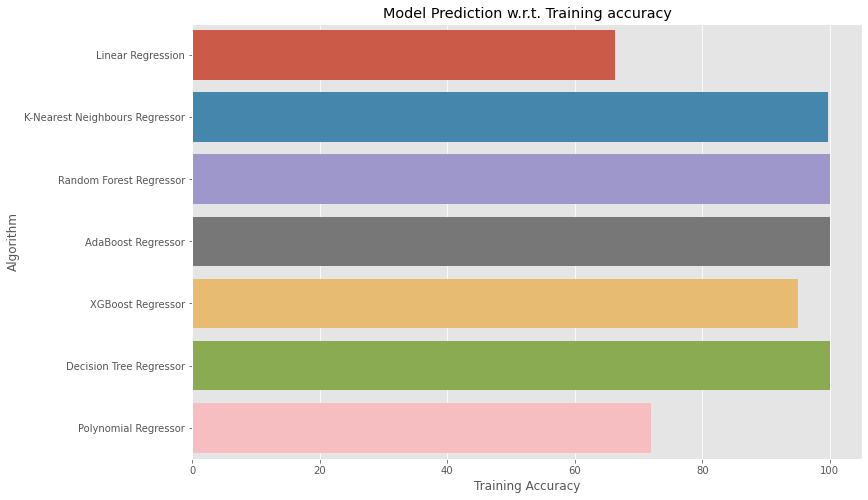

In [96]:
plt.style.use('ggplot') 
plt.figure(figsize=(12,8))
sns.barplot(y='Algorithm',x='Training Accuracy',data=models)
plt.title("Model Prediction w.r.t. Training accuracy")
plt.show()

### Algorithm vs. Testing Accuracy

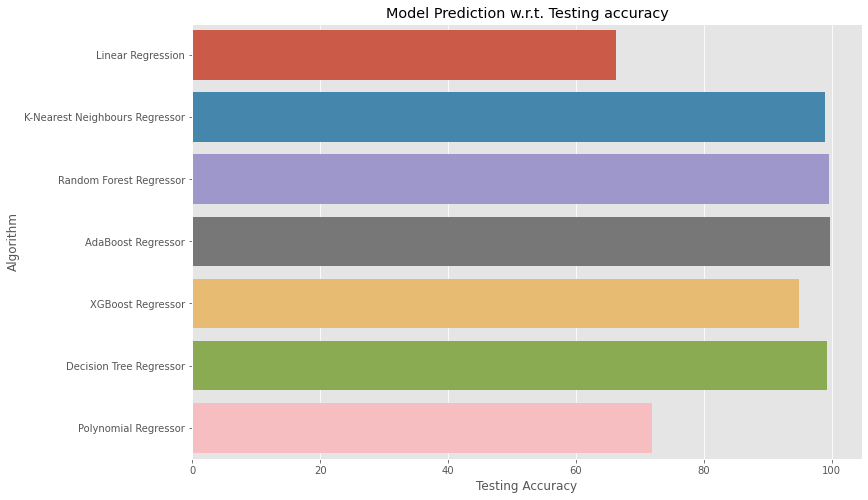

In [97]:
plt.style.use('ggplot') 
plt.figure(figsize=(12,8))
sns.barplot(y='Algorithm',x='Testing Accuracy',data=models)
plt.title("Model Prediction w.r.t. Testing accuracy")
plt.show()

In [38]:
import pickle 
pickle_out = open("reg.pkl", mode = 'wb') 
pickle.dump(a_reg, pickle_out) 
pickle_out.close()

In [ ]:


#!pip install -q streamlit

#!pip install -q streamlit_ace